# Groundwater Prediction - Aquifer Auser - Time Series Analysis 

## Section A: Data Preprocessing

### Step 1: Import relevant libraries:

In [1]:
# Standard libraries for data preprocessing
import os 
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
from datetime import datetime, date

In [2]:
# Standard Libraries for data processing and plotting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
# Data preprocessing modules
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler

In [4]:
# Modules for Model Evaluation & Improvement from sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math    
from scipy.stats import chi2_contingency

In [5]:
#Standard libraries for data visualization:
import seaborn as sns
sns.set_style('darkgrid')
from colorama import Fore

### Step 2: Set up/check the current working directory:

In [6]:
# Print the current working directory
print(os.listdir())

['Aquifer_Auser.csv', '.DS_Store', 'datasets_description.xlsx', 'GroundwaterPrediction_TimeseriesAnalysis.ipynb', '.ipynb_checkpoints']


### Step 3: Import/Read the dataset:

The data was downloaded from the following link: https://www.kaggle.com/c/acea-water-prediction

In [7]:
### Read the dataset and review
df = pd.read_csv('Aquifer_Auser.csv')

### Step 4: Evaluate data structure: 

In [8]:
df.head()   # Read the first five rows of the dataset

Date  Rainfall_Gallicano  Rainfall_Pontetetto  Rainfall_Monte_Serra  \
0  05/03/1998                 NaN                  NaN                   NaN   
1  06/03/1998                 NaN                  NaN                   NaN   
2  07/03/1998                 NaN                  NaN                   NaN   
3  08/03/1998                 NaN                  NaN                   NaN   
4  09/03/1998                 NaN                  NaN                   NaN   

   Rainfall_Orentano  Rainfall_Borgo_a_Mozzano  Rainfall_Piaggione  \
0                NaN                       NaN                 NaN   
1                NaN                       NaN                 NaN   
2                NaN                       NaN                 NaN   
3                NaN                       NaN                 NaN   
4                NaN                       NaN                 NaN   

   Rainfall_Calavorno  Rainfall_Croce_Arcana  \
0                 NaN                    NaN   
1                 NaN                    NaN   
2                 NaN                    NaN   
3                 NaN                    NaN   
4                 NaN                    NaN   

   Rainfall_Tereglio_Coreglia_Antelminelli  ...  Temperature_Monte_Serra  \
0                                      NaN  ...                      0.0   
1                                      NaN  ...                      0.0   
2                                      NaN  ...                      9.2   
3                                      NaN  ...                     11.4   
4                                      NaN  ...                     11.4   

   Temperature_Ponte_a_Moriano  Temperature_Lucca_Orto_Botanico  Volume_POL  \
0                          0.0                             0.00         NaN   
1                          0.0                            10.05         NaN   
2                          0.0                            10.00         NaN   
3                          0.0                            13.85         NaN   
4                          0.0                            12.85         NaN   

   Volume_CC1  Volume_CC2  Volume_CSA  Volume_CSAL  \
0         NaN         NaN         NaN          NaN   
1         NaN         NaN         NaN          NaN   
2         NaN         NaN         NaN          NaN   
3         NaN         NaN         NaN          NaN   
4         NaN         NaN         NaN          NaN   

   Hydrometry_Monte_S_Quirico  Hydrometry_Piaggione  
0                         NaN                   NaN  
1                         NaN                   NaN  
2                         NaN                   NaN  
3                         NaN                   NaN  
4                         NaN                   NaN  

[5 rows x 27 columns]

In [9]:
df.columns   # Check the columns of the dataset

Index(['Date', 'Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico', 'Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione'],
      dtype='object')

In [10]:
#df.describe()

In [11]:
df.info() # Get a brief summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     8154 non-null   object 
 1   Rainfall_Gallicano                       5295 non-null   float64
 2   Rainfall_Pontetetto                      5295 non-null   float64
 3   Rainfall_Monte_Serra                     5289 non-null   float64
 4   Rainfall_Orentano                        5295 non-null   float64
 5   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64
 6   Rainfall_Piaggione                       4930 non-null   float64
 7   Rainfall_Calavorno                       5295 non-null   float64
 8   Rainfall_Croce_Arcana                    5295 non-null   float64
 9   Rainfall_Tereglio_Coreglia_Antelminelli  5295 non-null   float64
 10  Rainfall_Fabbriche_di_Vallico            5295 no

In [12]:
print('Number of rows = %2.0i' %df.shape[0])
print('Number of columns = %2.0i' %df.shape[1])

Number of rows = 8154
Number of columns = 27


### Step 5: Remove unnecessary columns/rows

In [13]:
# Remove unnecessary rows:

# list of the columns to remove
cols_to_remove = []
data_rmv = df[cols_to_remove]
df.drop(columns=cols_to_remove,inplace=True,axis=1)
print('The following columns were removed from the dataset', cols_to_remove)

The following columns were removed from the dataset []


### Step 6: Perform necessary file conversion/column renaming

In [14]:
# Identify independent (features) and dependent (target) variables
target = ['Depth_to_Groundwater_LT2','Depth_to_Groundwater_SAL','Depth_to_Groundwater_CoS']
features = [feature for feature in df.columns if feature not in target]
df.head()

Date  Rainfall_Gallicano  Rainfall_Pontetetto  Rainfall_Monte_Serra  \
0  05/03/1998                 NaN                  NaN                   NaN   
1  06/03/1998                 NaN                  NaN                   NaN   
2  07/03/1998                 NaN                  NaN                   NaN   
3  08/03/1998                 NaN                  NaN                   NaN   
4  09/03/1998                 NaN                  NaN                   NaN   

   Rainfall_Orentano  Rainfall_Borgo_a_Mozzano  Rainfall_Piaggione  \
0                NaN                       NaN                 NaN   
1                NaN                       NaN                 NaN   
2                NaN                       NaN                 NaN   
3                NaN                       NaN                 NaN   
4                NaN                       NaN                 NaN   

   Rainfall_Calavorno  Rainfall_Croce_Arcana  \
0                 NaN                    NaN   
1                 NaN                    NaN   
2                 NaN                    NaN   
3                 NaN                    NaN   
4                 NaN                    NaN   

   Rainfall_Tereglio_Coreglia_Antelminelli  ...  Temperature_Monte_Serra  \
0                                      NaN  ...                      0.0   
1                                      NaN  ...                      0.0   
2                                      NaN  ...                      9.2   
3                                      NaN  ...                     11.4   
4                                      NaN  ...                     11.4   

   Temperature_Ponte_a_Moriano  Temperature_Lucca_Orto_Botanico  Volume_POL  \
0                          0.0                             0.00         NaN   
1                          0.0                            10.05         NaN   
2                          0.0                            10.00         NaN   
3                          0.0                            13.85         NaN   
4                          0.0                            12.85         NaN   

   Volume_CC1  Volume_CC2  Volume_CSA  Volume_CSAL  \
0         NaN         NaN         NaN          NaN   
1         NaN         NaN         NaN          NaN   
2         NaN         NaN         NaN          NaN   
3         NaN         NaN         NaN          NaN   
4         NaN         NaN         NaN          NaN   

   Hydrometry_Monte_S_Quirico  Hydrometry_Piaggione  
0                         NaN                   NaN  
1                         NaN                   NaN  
2                         NaN                   NaN  
3                         NaN                   NaN  
4                         NaN                   NaN  

[5 rows x 27 columns]

In [15]:
# Convert date column to datetime format and highlight with blue color
from datetime import datetime, date 
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')
df.head().style.set_properties(subset=['Date'], **{'background-color': 'dodgerblue'})

### Step 7: Inspect data visually

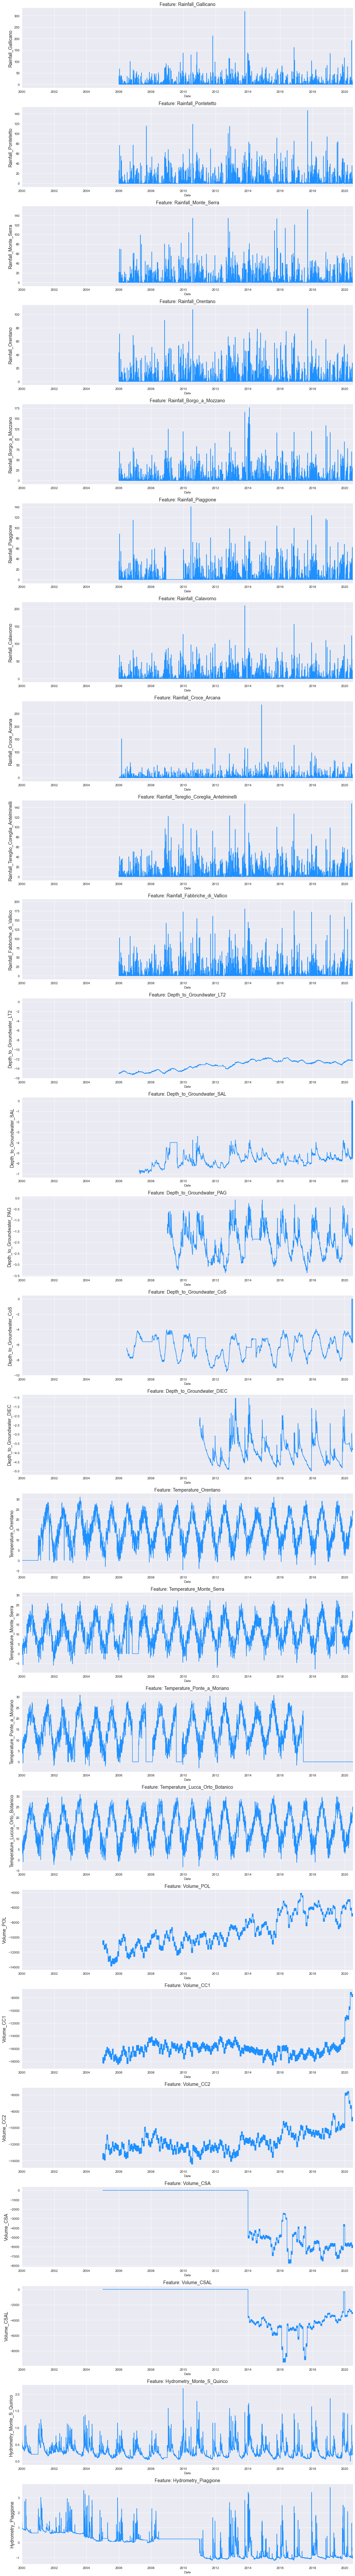

In [16]:
# Plot the data by filling missing values with ffill method
f, ax = plt.subplots(nrows=len(df.columns)-1, ncols=1, figsize=(15, 4*len(df.columns)))

for i, column in enumerate(df.drop('Date', axis=1).columns):
    sns.lineplot(x=df['Date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
    ax[i].set_xlim([date(2000, 1, 1), date(2020, 6, 30)])
plt.tight_layout()

In [17]:
df.isna().sum()

Date                                          0
Rainfall_Gallicano                         2859
Rainfall_Pontetetto                        2859
Rainfall_Monte_Serra                       2865
Rainfall_Orentano                          2859
Rainfall_Borgo_a_Mozzano                   2859
Rainfall_Piaggione                         3224
Rainfall_Calavorno                         2859
Rainfall_Croce_Arcana                      2859
Rainfall_Tereglio_Coreglia_Antelminelli    2859
Rainfall_Fabbriche_di_Vallico              2859
Depth_to_Groundwater_LT2                   3352
Depth_to_Groundwater_SAL                   3609
Depth_to_Groundwater_PAG                   4347
Depth_to_Groundwater_CoS                   3839
Depth_to_Groundwater_DIEC                  4884
Temperature_Orentano                          0
Temperature_Monte_Serra                       0
Temperature_Ponte_a_Moriano                   0
Temperature_Lucca_Orto_Botanico               0
Volume_POL                              

### Step 8: Chronological Order and Equidistant Timestamps
Check the data to ensure that timestaps are in chronological order and with constant time interval.

In [18]:
df= df.sort_values(by='Date') # sort values based on date

# Check time intervals
df['delta'] = df['Date'] - df['Date'].shift(1)

df[['Date', 'delta']].head()

Date  delta
0 1998-03-05    NaT
1 1998-03-06 1 days
2 1998-03-07 1 days
3 1998-03-08 1 days
4 1998-03-09 1 days

In [19]:
# check the total time interval and count of the time intervals
df['delta'].sum(), df['delta'].count()

(Timedelta('8153 days 00:00:00'), 8153)

### Step 9: Handle missing data

In [20]:
# check the percent of missing data
datasets=df.copy()

fig, ax = plt.subplots(figsize = (10,8))
NaN_values = (datasets.isnull().sum() / len(datasets) * 100).sort_values(ascending = False)
sns.barplot(x = NaN_values, y = NaN_values.index)
ax.set_title('NaN values %')
ax.spines['left'].set_visible(True)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.9)
ax.set_xlim((0,100))

(0.0, 100.0)

In [21]:
# Remove the column 'delta' used to check time intervals
df = df.drop('delta', axis=1)
df.isna().sum()  # Check missing data

Date                                          0
Rainfall_Gallicano                         2859
Rainfall_Pontetetto                        2859
Rainfall_Monte_Serra                       2865
Rainfall_Orentano                          2859
Rainfall_Borgo_a_Mozzano                   2859
Rainfall_Piaggione                         3224
Rainfall_Calavorno                         2859
Rainfall_Croce_Arcana                      2859
Rainfall_Tereglio_Coreglia_Antelminelli    2859
Rainfall_Fabbriche_di_Vallico              2859
Depth_to_Groundwater_LT2                   3352
Depth_to_Groundwater_SAL                   3609
Depth_to_Groundwater_PAG                   4347
Depth_to_Groundwater_CoS                   3839
Depth_to_Groundwater_DIEC                  4884
Temperature_Orentano                          0
Temperature_Monte_Serra                       0
Temperature_Ponte_a_Moriano                   0
Temperature_Lucca_Orto_Botanico               0
Volume_POL                              

### Step 9.1: Plot missing data

In [22]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

plot_col='Depth_to_Groundwater_SAL'

old_hydrometry = df[plot_col].copy()
df[plot_col] = df[plot_col].replace(0, np.nan)

sns.lineplot(x=df['Date'], y=old_hydrometry, ax=ax[0], color='darkorange', label='original')
sns.lineplot(x=df['Date'], y=df[plot_col].fillna(np.inf), ax=ax[0], 
             color='dodgerblue', label='modified')
ax[0].set_title('Feature: ' +plot_col, fontsize=14)
ax[0].set_ylabel(ylabel=plot_col, fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plot_col='Hydrometry_Piaggione'
old_drainage = df[plot_col].copy()
df[plot_col] = df[plot_col].replace(0, np.nan)

sns.lineplot(x=df['Date'], y=old_drainage, ax=ax[1], color='darkorange', label='original')
sns.lineplot(x=df['Date'], y=df[plot_col].fillna(np.inf), 
             ax=ax[1], color='dodgerblue', label='modified')
ax[1].set_title('Feature: '+plot_col, fontsize=14)
ax[1].set_ylabel(ylabel=plot_col, fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

(14245.0, 18443.0)

In [23]:
# Check missing values with a graph
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,12))

sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

### Step 9.2: Possible approaches to handle missing values

* **Option 1: Fill NaN with Outlier or Zero (e.g., np.inf or 0)**

* **Option 2: Fill NaN with Mean Value**

* **Option 3: Fill NaN with Last Value with .ffill()**

* **Option 4: Fill NaN with Linearly Interpolated Value with .interpolate() - requires the neighboring data**


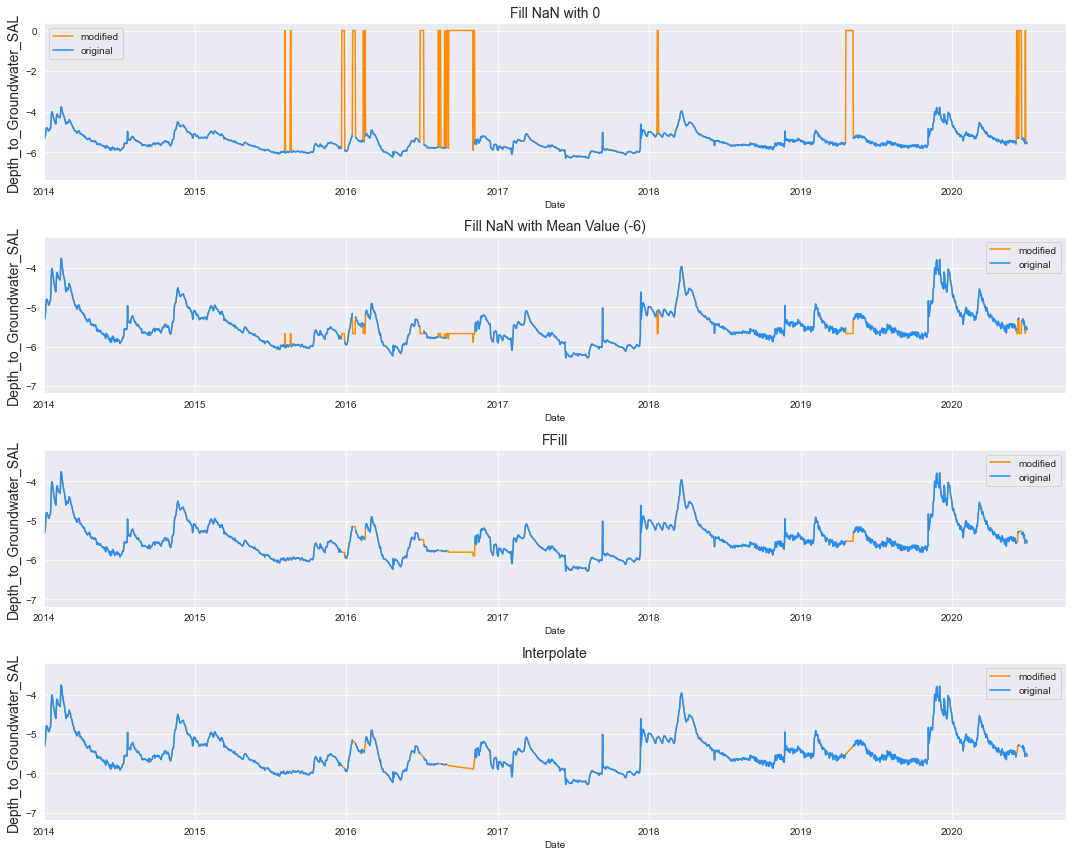

In [24]:
# Plot timeseries data with four different approaches to evaluate their impact
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

plot_col='Depth_to_Groundwater_SAL'
sns.lineplot(x=df['Date'], y=df[plot_col].fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=df['Date'], y=df[plot_col].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel=plot_col, fontsize=14)

sns.lineplot(x=df['Date'], y=df[plot_col].fillna(df[plot_col].mean()), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=df['Date'], y=df[plot_col].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({df[plot_col].mean():.0f})', fontsize=14)
ax[1].set_ylabel(ylabel=plot_col, fontsize=14)

sns.lineplot(x=df['Date'], y=df[plot_col].ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=df['Date'], y=df[plot_col].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel=plot_col, fontsize=14)

sns.lineplot(x=df['Date'], y=df[plot_col].interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=df['Date'], y=df[plot_col].fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel=plot_col, fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2014, 1, 1), date(2020, 10, 1)])
    
plt.tight_layout()
plt.show()

### Step 9.3: Apply the selected method for missing data

In [25]:
# For this dataset, interpolation cane be an effective solution for missing data.
for col in df.drop('Date', axis=1).columns:
    df[col]=df[col].replace(0,np.nan)
    df[col]=df[col].interpolate()

In [26]:
# Since a larger portion of the data before 2006 are missing, select only the range from 2006
df_temp=df.copy()
df=df_temp.iloc[5781:,:]

In [27]:
# Recheck the dataset
df.head()

Date  Rainfall_Gallicano  Rainfall_Pontetetto  \
5781 2014-01-01            1.933333                  0.2   
5782 2014-01-02            2.800000                  0.4   
5783 2014-01-03           36.600000                 33.2   
5784 2014-01-04           12.200000                 15.4   
5785 2014-01-05          132.000000                 30.2   

      Rainfall_Monte_Serra  Rainfall_Orentano  Rainfall_Borgo_a_Mozzano  \
5781                 32.28                0.2                  1.466667   
5782                 38.24                0.2                  2.000000   
5783                 44.20               45.4                 78.200000   
5784                 25.60               11.0                 23.600000   
5785                 27.20               25.0                138.000000   

      Rainfall_Piaggione  Rainfall_Calavorno  Rainfall_Croce_Arcana  \
5781                 3.1                 1.0                    0.6   
5782                 0.8                 1.8                    1.0   
5783                40.6                35.2                    1.4   
5784                10.2                14.2                    9.7   
5785                39.8                66.0                   18.0   

      Rainfall_Tereglio_Coreglia_Antelminelli  ...  Temperature_Monte_Serra  \
5781                                     0.65  ...                     4.15   
5782                                     0.80  ...                     5.60   
5783                                     0.20  ...                     7.95   
5784                                     1.20  ...                     8.75   
5785                                     0.80  ...                     6.30   

      Temperature_Ponte_a_Moriano  Temperature_Lucca_Orto_Botanico  \
5781                         5.80                             4.55   
5782                         6.80                             7.05   
5783                        10.30                            10.35   
5784                        12.10                            12.65   
5785                         9.95                            10.00   

      Volume_POL  Volume_CC1  Volume_CC2   Volume_CSA  Volume_CSAL  \
5781   -8311.680 -16453.1520 -11924.0640 -5087.258065 -3680.838710   
5782   -8311.680 -16453.1520 -11924.0640 -5087.258065 -3680.838710   
5783   -8311.680 -16453.1520 -11924.0640 -5087.258065 -3680.838710   
5784   -8311.680 -16453.1520 -11924.0640 -5087.258065 -3680.838710   
5785   -7896.096 -15630.4944 -11327.8608 -4832.895161 -3496.796774   

      Hydrometry_Monte_S_Quirico  Hydrometry_Piaggione  
5781                        0.47                 -0.50  
5782                        0.48                 -0.51  
5783                        0.64                  0.15  
5784                        0.80                  0.79  
5785                        1.67                  3.39  

[5 rows x 27 columns]

### Step 9.3: Recheck missing values 
It is important to ensure that there is no missing data in the dataset

In [28]:
df.isna().sum()

Date                                       0
Rainfall_Gallicano                         0
Rainfall_Pontetetto                        0
Rainfall_Monte_Serra                       0
Rainfall_Orentano                          0
Rainfall_Borgo_a_Mozzano                   0
Rainfall_Piaggione                         0
Rainfall_Calavorno                         0
Rainfall_Croce_Arcana                      0
Rainfall_Tereglio_Coreglia_Antelminelli    0
Rainfall_Fabbriche_di_Vallico              0
Depth_to_Groundwater_LT2                   0
Depth_to_Groundwater_SAL                   0
Depth_to_Groundwater_PAG                   0
Depth_to_Groundwater_CoS                   0
Depth_to_Groundwater_DIEC                  0
Temperature_Orentano                       0
Temperature_Monte_Serra                    0
Temperature_Ponte_a_Moriano                0
Temperature_Lucca_Orto_Botanico            0
Volume_POL                                 0
Volume_CC1                                 0
Volume_CC2

### Step 10: Apply Resampling/Smoothing

Apply a propoer downsampling approach (i.e., days to weeks/months) to attain a more smooth dataseries.

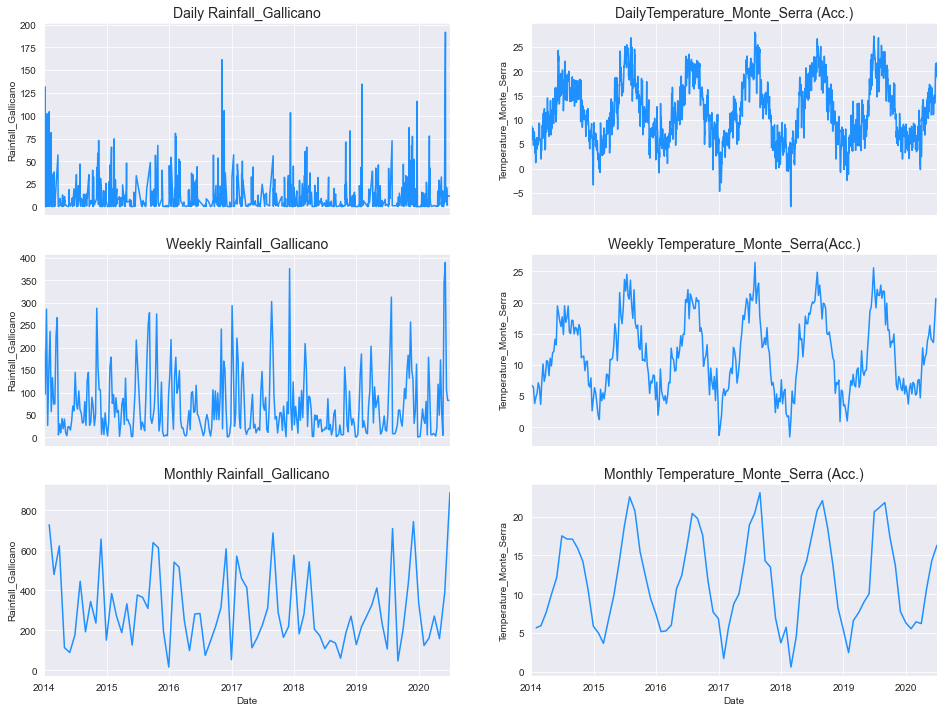

In [29]:
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16,12))

ref_col='Rainfall_Gallicano'
sns.lineplot(df['Date'], df[ref_col], color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('Daily '+ref_col, fontsize=14)

resampled_df = df[['Date',ref_col]].resample('7D', on='Date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['Date'], resampled_df[ref_col], color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Weekly '+ref_col, fontsize=14)

resampled_df = df[['Date',ref_col]].resample('M', on='Date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['Date'], resampled_df[ref_col], color='dodgerblue', ax=ax[2, 0])
ax[2, 0].set_title('Monthly '+ref_col, fontsize=14)

for i in range(3):
    ax[i, 0].set_xlim([date(2006, 1, 1), date(2020, 6, 30)])

ref_col='Temperature_Monte_Serra'    
sns.lineplot(df['Date'], df[ref_col], color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Daily'+ref_col+' (Acc.)', fontsize=14)

resampled_df = df[['Date',ref_col]].resample('7D', on='Date').mean().reset_index(drop=False)
sns.lineplot(resampled_df['Date'], resampled_df[ref_col], color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly '+ref_col+'(Acc.)', fontsize=14)

resampled_df = df[['Date',ref_col]].resample('M', on='Date').mean().reset_index(drop=False)
sns.lineplot(resampled_df['Date'], resampled_df[ref_col], color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly '+ref_col+' (Acc.)', fontsize=14)

for i in range(3):
    ax[i, 1].set_xlim([date(2014, 1, 1), date(2020, 6, 30)])
plt.show()

In [30]:
# As we can see, downsample to weekly could smooth the data and help with analysis
# Therefore, daily data is downsampled to weekly data
downsample = df.resample('7D', on='Date').mean().reset_index(drop=False)

df = downsample.copy()

### Step 11: Stationary check

Check the stationarity of the data:

(i) visual evaluation: by plotting time series to evalaute the presence of seasonal trends
(ii) basic statistical evaluation: by splitting the time series into segments and comparing their mean and variance. 
(iii) statistical test evalution: by applying Augmented Dickey Fuller Test

### Step 11.1: Stationary visual check

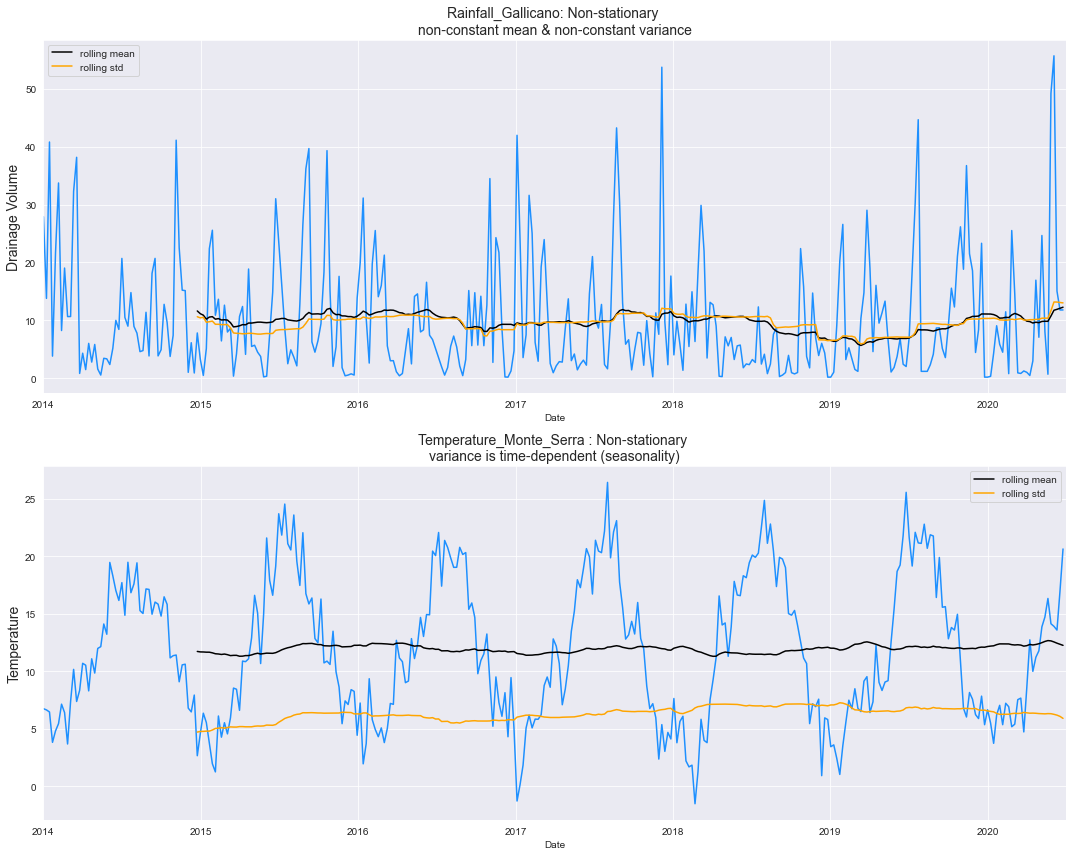

In [31]:
# A year has 52 weeks (52 weeks * 7 days per week) aporx.
rolling_window = 52
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

ref_col='Rainfall_Gallicano'
sns.lineplot(x=df['Date'], y=df[ref_col], ax=ax[0], color='dodgerblue')
sns.lineplot(x=df['Date'], y=df[ref_col].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=df['Date'], y=df[ref_col].rolling(rolling_window).std(), ax=ax[0], color='orange', label='rolling std')
ax[0].set_title(ref_col+': Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0].set_ylabel(ylabel='Drainage Volume', fontsize=14)
ax[0].set_xlim([date(2014, 1, 1), date(2020, 6, 30)])

ref_col='Temperature_Monte_Serra'
sns.lineplot(x=df['Date'], y=df[ref_col], ax=ax[1], color='dodgerblue')
sns.lineplot(x=df['Date'], y=df[ref_col].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=df['Date'], y=df[ref_col].rolling(rolling_window).std(), ax=ax[1], color='orange', label='rolling std')
ax[1].set_title(ref_col+' : Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)
ax[1].set_xlim([date(2014, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

Visual evaluation indicates that the mean and standard variation of the variables show slight variation.

### Step 11.2: Check stationary with statistics

#### Unit Root Test

Unit root is a characteristic of a time series that makes it non-stationary. And ADF test belong to the unit root test. Technically , a unit root is said to exist in a time series of value of alpha =1 in below equation.

$Y_t = 	\alpha Y_{t-1} + 	\beta X_{e} + \epsilon $

where Yt is value of the time series at time ‘t’ and Xe is an exogenous variable .

**The presence of a unit root means the time series is non-stationary.**



### Step 11.3: Check stationary Augmented Dickey-Fuller (ADF)


**Augmented Dickey-Fuller (ADF)** test is a type of statistical test called a unit root test. Unit roots are a cause for non-stationarity.

* **Null Hypothesis (H0)**: Time series has a unit root. (Time series is not stationary).

* **Alternate Hypothesis (H1)**: Time series has no unit root (Time series is stationary).

**If the null hypothesis can be rejected, we can conclude that the time series is stationary.**

There are two ways to rejects the null hypothesis:

On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%

* <font color='red'>**p-value > significance level (default: 0.05)**</font>: Fail to reject the null hypothesis (H0), the data has a unit root and is <font color='red'>non-stationary</font>.
* <font color='green'>**p-value <= significance level (default: 0.05)**</font>: Reject the null hypothesis (H0), the data does not have a unit root and is <font color='green'>stationary</font>.
    
On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.
* <font color='red'>**ADF statistic > critical value**</font>: Fail to reject the null hypothesis (H0), the data has a unit root and is <font color='red'>non-stationary</font>.
* <font color='green'>**ADF statistic < critical value**</font>: Reject the null hypothesis (H0), the data does not have a unit root and is <font color='green'>stationary</font>.

In [32]:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html
from statsmodels.tsa.stattools import adfuller

In [33]:
# Thanks to https://www.kaggle.com/iamleonie for this function!
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df['Date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df['Rainfall_Gallicano'].values, 'Rainfall_Gallicano ', ax[0, 0])
visualize_adfuller_results(df['Temperature_Orentano'].values, 'Temperature_Orentano', ax[1, 0])
visualize_adfuller_results(df['Hydrometry_Monte_S_Quirico'].values, 'Hydrometry_Monte_S_Quirico', ax[0, 1])
visualize_adfuller_results(df['Volume_CSA'].values, 'Volume_CSA', ax[1, 1])
visualize_adfuller_results(df['Depth_to_Groundwater_SAL'].values, 'Depth_to_Groundwater_SAL', ax[2, 0])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

### Step 12: Tranform series into stationary
If the data is not stationary but we want to use a model such as ARIMA (that requires this characteristic), the data has to be transformed.

The two most common methods to transform series into stationarity ones are:

* **Transformation**: e.g. log or square root to stabilize non-constant variance
* **Differencing**: subtracts the current value from the previous

### Step 12.1: Transformation

### Step 12.2: Differencing
Differencing can be done in different orders:
* First order differencing: linear trends with $z_i = y_i - y_{i-1}$
* Second-order differencing: quadratic trends with $z_i = (y_i - y_{i-1}) - (y_{i-1} - y_{i-2})$
* and so on...

### Step 13:  Feature Engineering 

In [34]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df['day_of_year'] = pd.DatetimeIndex(df['Date']).dayofyear
df['week_of_year'] = pd.DatetimeIndex(df['Date']).weekofyear
df['quarter'] = pd.DatetimeIndex(df['Date']).quarter
df['season'] = df['month'] % 12 // 3 + 1

df[['Date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()

Date  year  month  day  day_of_year  week_of_year  quarter  season
0 2014-01-01  2014      1    1            1             1        1       1
1 2014-01-08  2014      1    8            8             2        1       1
2 2014-01-15  2014      1   15           15             3        1       1
3 2014-01-22  2014      1   22           22             4        1       1
4 2014-01-29  2014      1   29           29             5        1       1

### Step 13.1: Encoding Cyclical Features

The new time features are cyclical. For example,the feature month cycles between 1 and 12 for every year. While the difference between each month increments by 1 during the year, between two years the `month` feature jumps from 12 (December) to 1 (January). This results in a -11 difference, which can confuse a lot of models.

In [35]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=df['Date'], y=df['month'], color='dodgerblue')
ax.set_xlim([date(2014, 1, 1), date(2020, 6, 30)])
plt.show()

### Step 13.2: TimeSeries Decomposition

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

These components are defined as follows:

* **Level**: The average value in the series.
* **Trend**: The increasing or decreasing value in the series.
* **Seasonality**: The repeating short-term cycle in the series.
* **Noise**: The random variation in the series.

Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

All series have a level and noise. The trend and seasonality components are optional.

It is helpful to think of the components as combining either additively or multiplicatively:
* **Additive**: $y(t) = Level + Trend + Seasonality + Noise$
* **Multiplicative**: $y(t) = Level * Trend * Seasonality * Noise$

In this case we are going to use function seasonal_decompose() from the [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) library.

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
core_columns = features

for column in core_columns:
    decomp = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

In [37]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['Temperature_Orentano', 'Depth_to_Groundwater_SAL']):
    
    res = seasonal_decompose(df[column], freq=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

### Step 13.3: Lag

We want to calculate each variable with a `shift()` (lag) to compare the correlationwith the other variables.

You can see [documentation of shift function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html) for more information.

In [38]:
weeks_in_month = 4

for column in core_columns:
    df[f'{column}_seasonal_shift_b_2m'] = df[f'{column}_seasonal'].shift(-2 * weeks_in_month)
    df[f'{column}_seasonal_shift_b_1m'] = df[f'{column}_seasonal'].shift(-1 * weeks_in_month)
    df[f'{column}_seasonal_shift_1m'] = df[f'{column}_seasonal'].shift(1 * weeks_in_month)
    df[f'{column}_seasonal_shift_2m'] = df[f'{column}_seasonal'].shift(2 * weeks_in_month)
    df[f'{column}_seasonal_shift_3m'] = df[f'{column}_seasonal'].shift(3 * weeks_in_month)

# Section B: Explonatory Data Anslysis
## Step 14: Seasonal variation of variables 

In [39]:
f, ax = plt.subplots(nrows=len(core_columns), ncols=1, figsize=(15, 4*len(core_columns)))
f.suptitle('Seasonal Components of Features', fontsize=16)

for i, column in enumerate(core_columns):
    sns.lineplot(x=df['Date'], y=df[column + '_seasonal'], ax=ax[i], color='dodgerblue', label='P25')
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([date(2018, 1, 1), date(2020, 6, 30)])
    
plt.tight_layout()
plt.show()

Seasonal variation of the variables can be clearly seen from the top plots.

### Step 15: Correlation between variables

In [40]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 25))

corrmat = df[core_columns].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title('Correlation Matrix of Core Features', fontsize=16)

shifted_cols = [
    'Depth_to_Groundwater_PAG_seasonal',         
    'Temperature_Orentano_seasonal_shift_b_2m',
    'Volume_CSA_seasonal_shift_2m', 
    'Hydrometry_Monte_S_Quirico_seasonal_shift_3m'
]
corrmat = df[shifted_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
ax[1].set_title('Correlation Matrix of Lagged Features', fontsize=16)


plt.tight_layout()
plt.show()

Shifted features have relatively higher correlation than the unshifted variables.

## Section C: Modelling

### Step 16.1 : Univariate Time Series Model -1 : Facebook Prophet Model 

Prophet, or “Facebook Prophet,” is an open-source library for univariate (one variable) time series forecasting developed by Facebook.

Prophet implements what they refer to as an additive time series forecasting model, and the implementation supports trends, seasonality, and holidays.

In [41]:
train_size = int(0.85 * len(df))
test_size = len(df) - train_size

univariate_df = df[['Date', 'Depth_to_Groundwater_SAL']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from fbprophet import Prophet


# Train the model
model = Prophet()
model.fit(train)

# x_valid = model.make_future_dataframe(periods=test_size, freq='w')

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE: 0.45721069906229644


In [43]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

### Step 16.2 : Univariate Time Series Model - 2 : LSTM

In [44]:
from sklearn.preprocessing import MinMaxScaler

data = univariate_df.filter(['y'])
#Convert the dataframe to a numpy array
dataset = data.values

scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)

In [45]:
# Defines the rolling window
look_back = 26
# Split into train and test sets
train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

236 51


In [46]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5, validation_data=(x_test, y_test))

model.summary()

Epoch 1/5
236/236 [==============================] - 16s 27ms/step - loss: 0.0748 - val_loss: 0.0249
Epoch 2/5
236/236 [==============================] - 2s 7ms/step - loss: 0.0104 - val_loss: 0.0207
Epoch 3/5
236/236 [==============================] - 2s 7ms/step - loss: 0.0098 - val_loss: 0.0154
Epoch 4/5
236/236 [==============================] - 2s 7ms/step - loss: 0.0085 - val_loss: 0.0145
Epoch 5/5
236/236 [==============================] - 2s 7ms/step - loss: 0.0076 - val_loss: 0.0117
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            79360     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 25)                1625      
_____________________

In [47]:
# Lets predict with the model
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Get the root mean squared error (RMSE) and MAE
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

RMSE: 0.24764305937023165


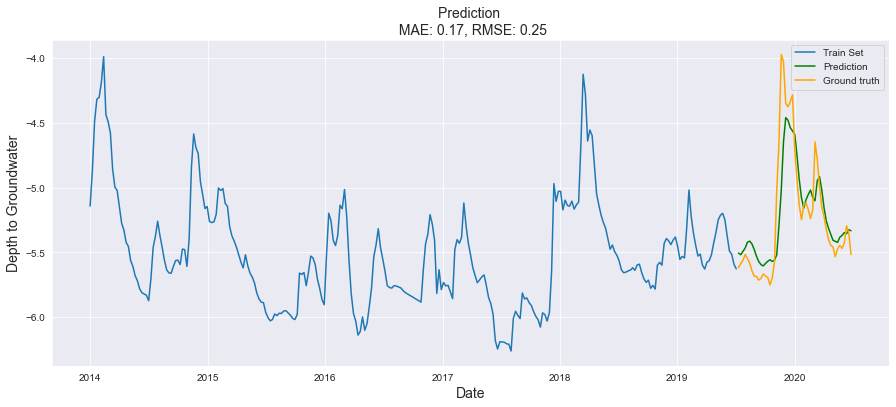

In [48]:
x_train_ticks = univariate_df.head(train_size)['ds']
y_train = univariate_df.head(train_size)['y']
x_test_ticks = univariate_df.tail(test_size)['ds']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

### Step 17: Multivariate Time Series Model: Facebook Prophet 

In [49]:
feature_columns = [col for col in features if col not in ['Date']]
target_column = [target[2]]

train_size = int(0.85 * len(df))

multivariate_df = df[['Date']+target_column + feature_columns].copy()
multivariate_df.columns = ['ds', 'y'] + feature_columns

train = multivariate_df.iloc[:train_size, :]
x_train, y_train = pd.DataFrame(multivariate_df.loc[:train_size, ['ds']+feature_columns]), pd.DataFrame(multivariate_df.loc[:train_size, 'y'])
x_valid, y_valid = pd.DataFrame(multivariate_df.loc[train_size:, ['ds']+feature_columns]), pd.DataFrame(multivariate_df.loc[train_size:, 'y'])

In [50]:
from fbprophet import Prophet


# Train the model
model = Prophet()
for col in feature_columns:
    model.add_regressor(col)

# Fit the model with train set
model.fit(train)

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE: 0.7992115504518869


In [53]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth')

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

### Step 19: Save the model to make more predictions

In [58]:
import joblib
SaveModel=True

if SaveModel:
    filename = 'GroundwaterPrediction_model.model'
    i = [model]
    joblib.dump(i,filename)

### References:

* [TimeSeries Analysis 📈A Complete Guide 📚](https://www.kaggle.com/andreshg/timeseries-analysis-a-complete-guide), by OAndresHG
* [Intro to Time Series Forecasting](https://www.kaggle.com/iamleonie/intro-to-time-series-forecasting), by Leonie
* [Acea Smart Water: Full EDA & Prediction](https://www.kaggle.com/maksymshkliarevskyi/acea-smart-water-full-eda-prediction), by Maksym Shkliarevskyi
* Special reference for the helpful information and plots - https://www.kaggle.com/iamleonie/intro-to-time-series-forecasting
* ARIMA - https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06
* Auto-ARIMA - https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
* Keras LSTM - https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
* Prophet - https://towardsdatascience.com/time-series-prediction-using-prophet-in-python-35d65f626236
* Special reference - https://www.kaggle.com/iamleonie/intro-to-time-series-forecasting/notebook#Models
* Cyclical features - https://towardsdatascience.com/cyclical-features-encoding-its-about-time-ce23581845ca
* ADF - https://medium.com/@cmukesh8688/why-is-augmented-dickey-fuller-test-adf-test-so-important-in-time-series-analysis-6fc97c6be2f0
* ACF/PACF - https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8
* LSTM - https://towardsdatascience.com/time-series-analysis-visualization-forecasting-with-lstm-77a905180eba